In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import superscreen as sc
from superscreen.geometry import box

import sys
sys.path.insert(0, "..")
import squids

In [2]:
squid = squids.ibm.medium.make_squid()

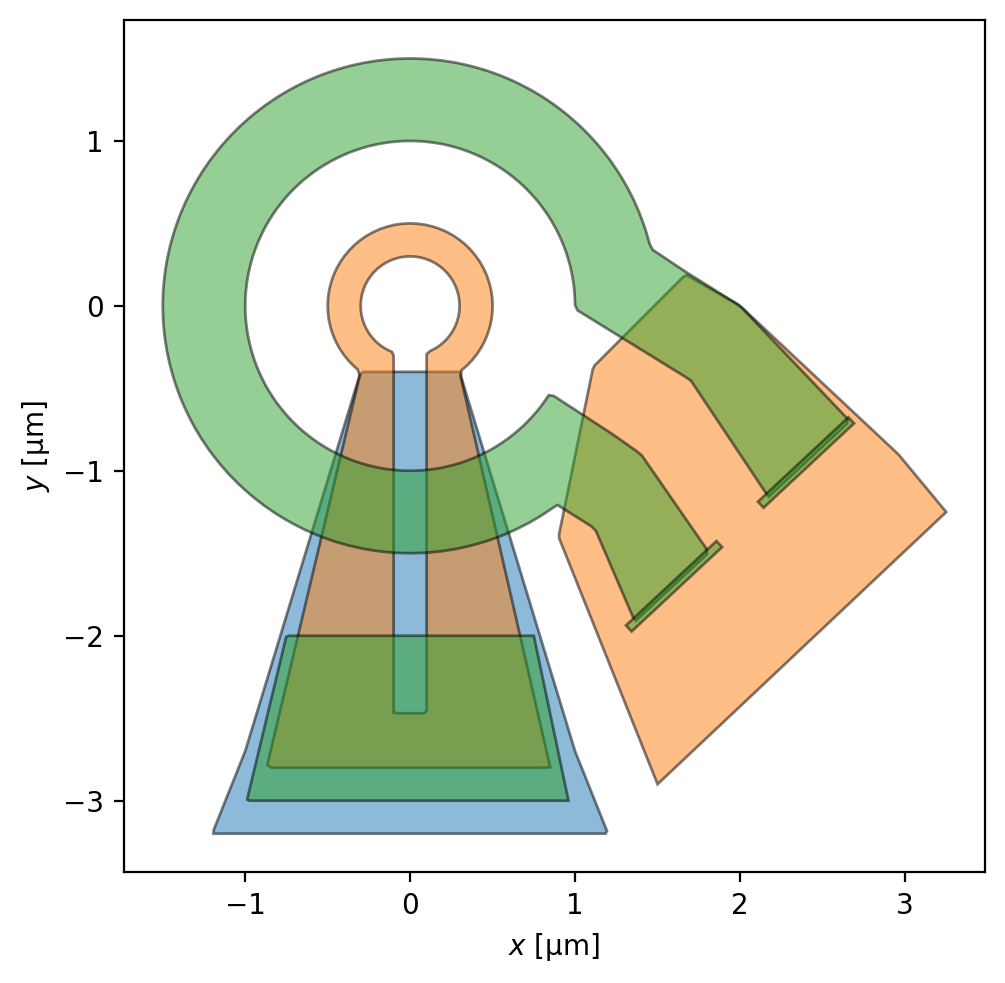

In [3]:
fig, ax = squid.draw()

In [4]:
squid.make_mesh(max_edge_length=0.1, smooth=100)

In [5]:
squid.mesh_stats()

,length_units,'um'
'fc',num_sites,2033
,num_elements,3564
,min_edge_length,2.602e-02
,max_edge_length,9.993e-02
,min_vertex_area,2.036e-04
,max_vertex_area,7.212e-03
'fc_shield',num_sites,2457
,num_elements,4681
,min_edge_length,1.684e-02
,max_edge_length,1.001e-01


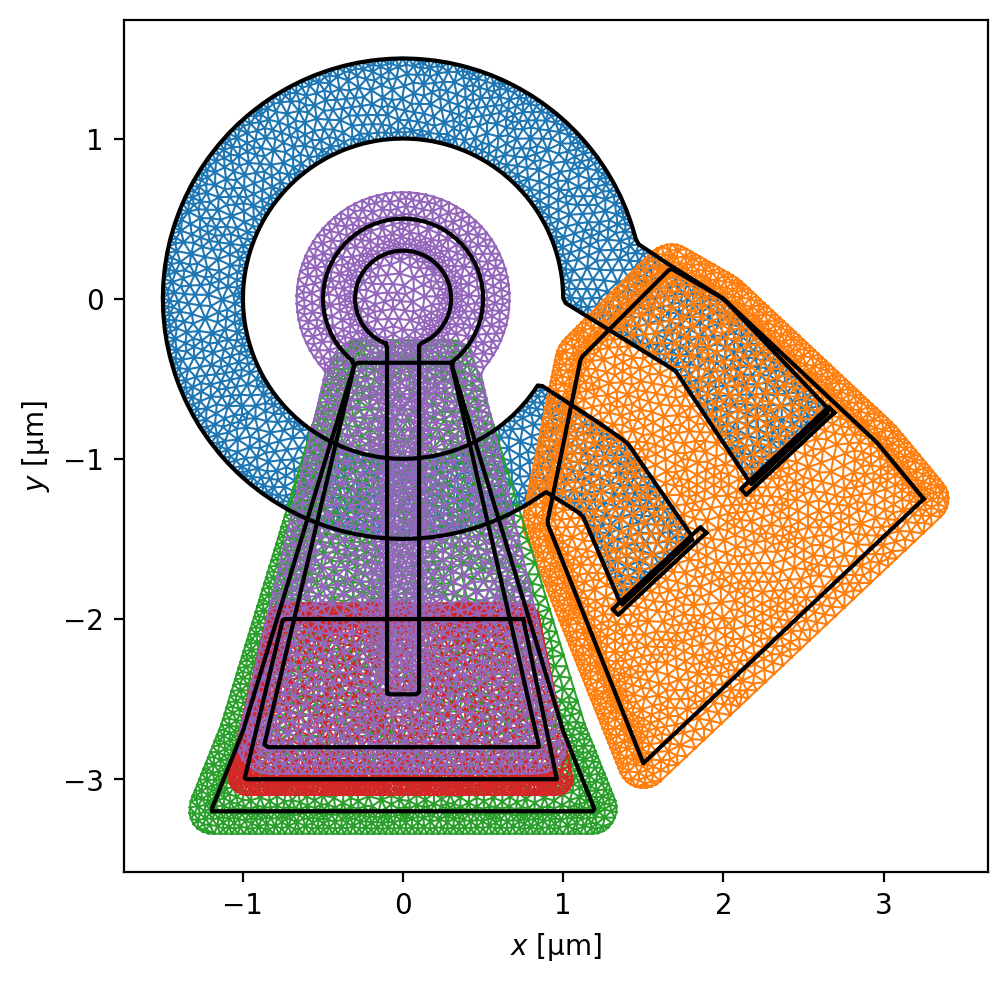

In [6]:
fig, ax = squid.plot_mesh()
_ = squid.plot_polygons(ax=ax, color="k")

In [7]:
I_fc = "1 mA"

solutions = sc.solve(
    squid,
    terminal_currents={"fc": {"source": I_fc, "drain": f"-{I_fc}"}},
    iterations=10,
)

Layer 'fc': The film thickness, d = 0.1600 µm, is greater than or equal to the London penetration depth, resulting in an effective penetration depth Λ = 0.0400 µm <= λ = 0.0800 µm. The assumption that the current density is nearly constant over the thickness of the film may not be valid.
Layer 'fc_shield': The film thickness, d = 0.1000 µm, is greater than or equal to the London penetration depth, resulting in an effective penetration depth Λ = 0.0640 µm <= λ = 0.0800 µm. The assumption that the current density is nearly constant over the thickness of the film may not be valid.
Layer 'pl_shield1': The film thickness, d = 0.2000 µm, is greater than or equal to the London penetration depth, resulting in an effective penetration depth Λ = 0.0320 µm <= λ = 0.0800 µm. The assumption that the current density is nearly constant over the thickness of the film may not be valid.
Layer 'pl_shield2': The film thickness, d = 0.1600 µm, is greater than or equal to the London penetration depth, resul

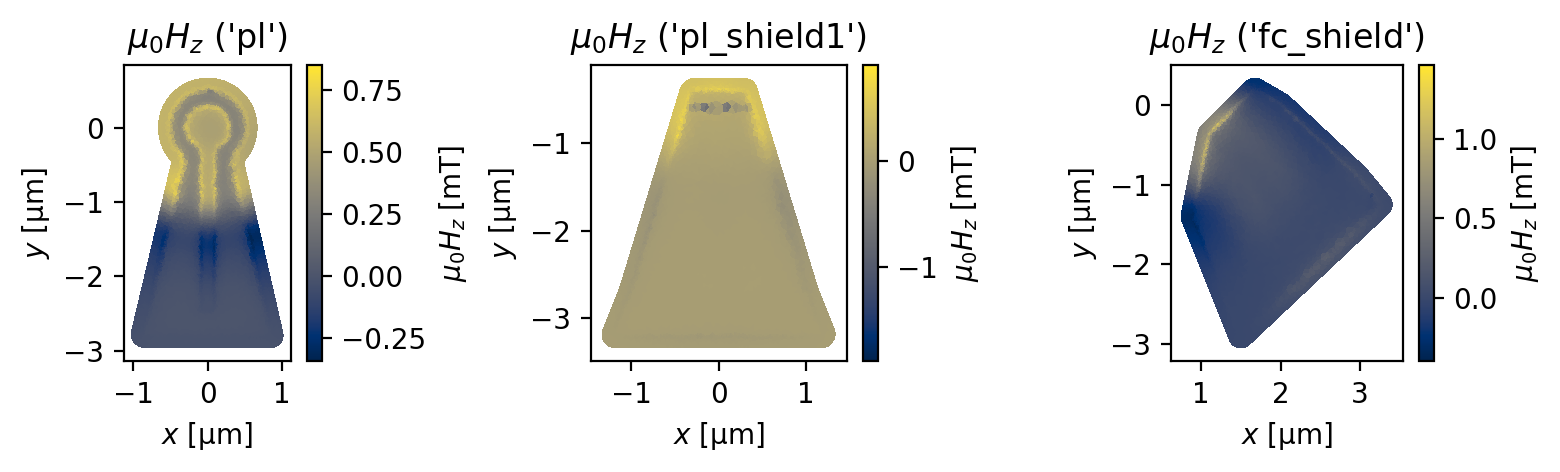

In [8]:
fig, axes = solutions[-1].plot_fields(films=["pl", "pl_shield1", "fc_shield"], figsize=(8, 2.5))
fig.tight_layout()

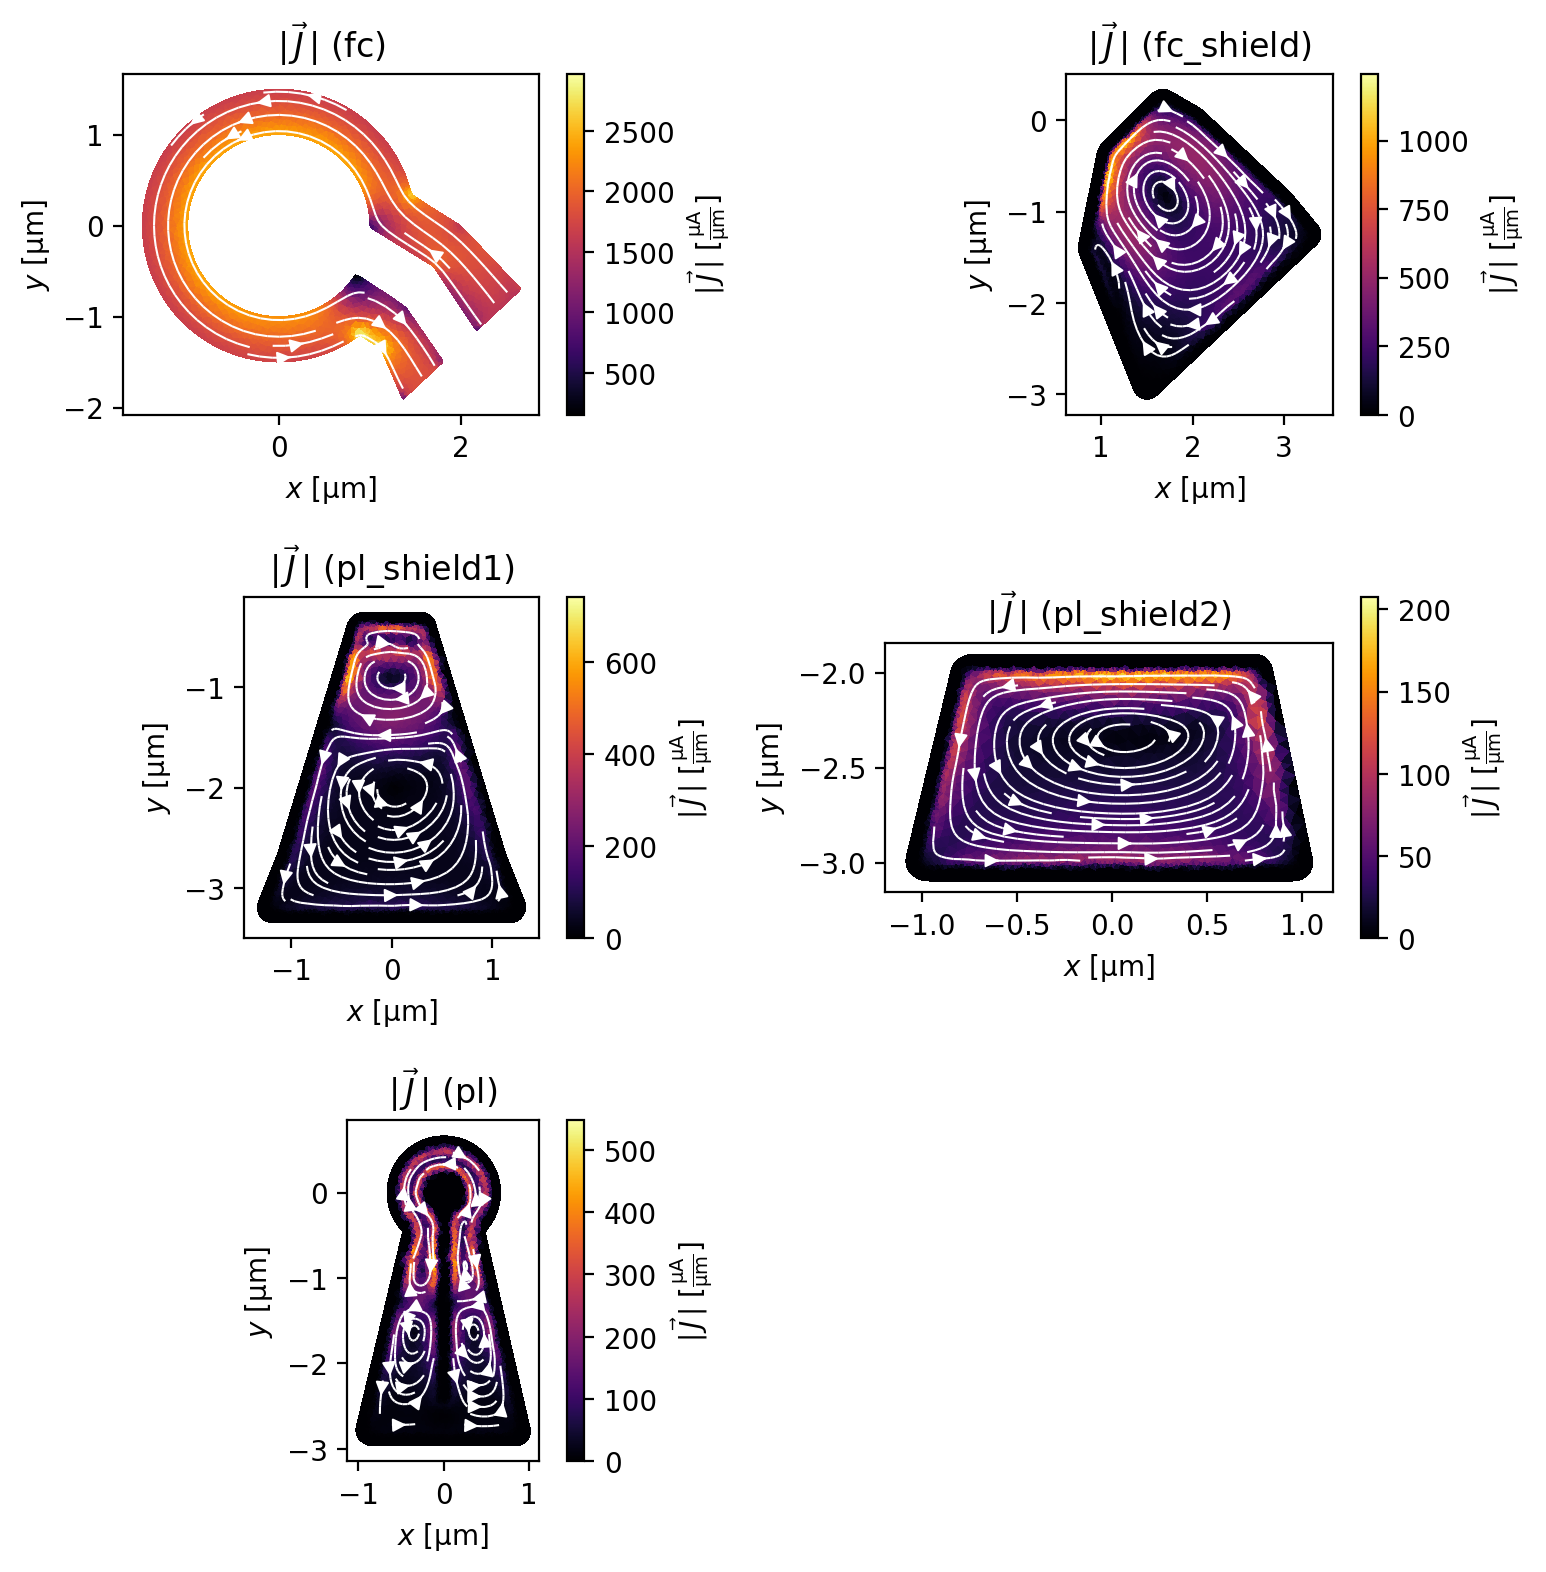

In [9]:
fig, axes = solutions[-1].plot_currents(max_cols=2, figsize=(8, 8))
fig.tight_layout()

In [10]:
eval_mesh = sc.Polygon(points=box(7.5, 7.5, points=401)).make_mesh(max_edge_length=0.15)

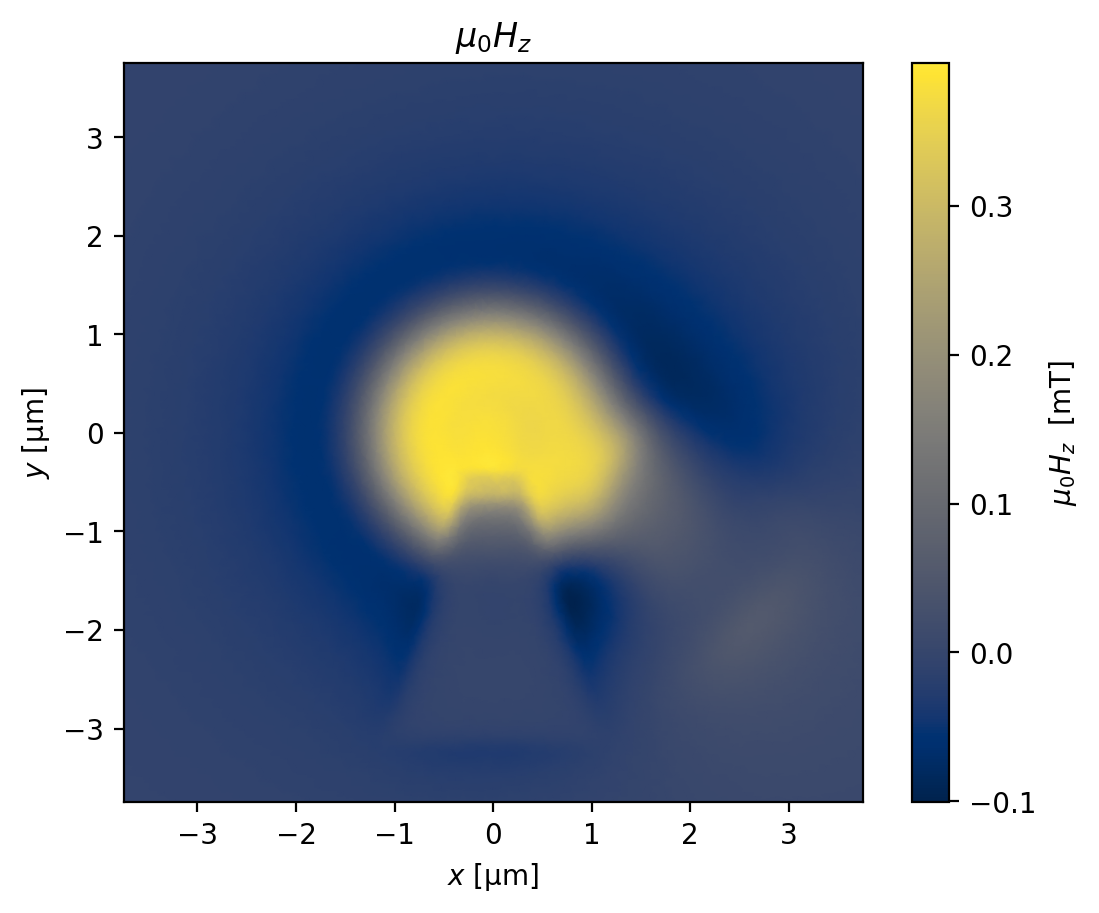

In [11]:
_ = solutions[-1].plot_field_at_positions(eval_mesh, zs=0)

In [12]:
fluxoids = [sum(solution.hole_fluxoid("pl_center")) for solution in solutions]
mutual_inductance = [(fluxoid / sc.ureg(I_fc)).to("Phi_0 / A").m for fluxoid in fluxoids]

Mutual inductance = 158.7 Phi_0 / A


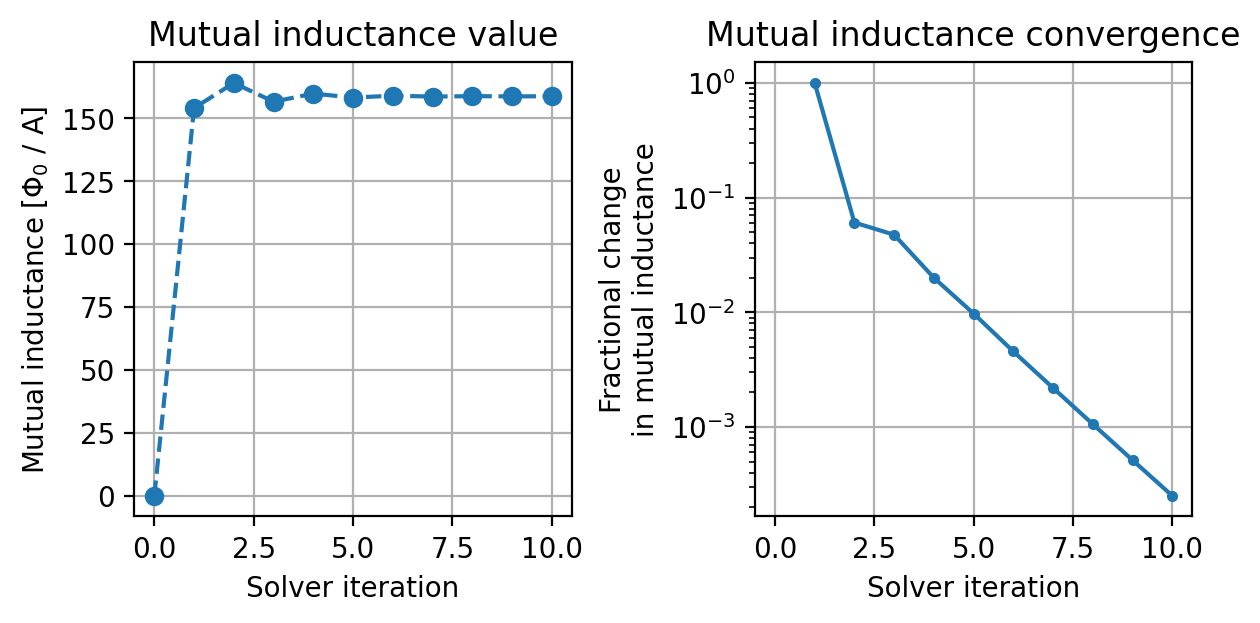

In [13]:
print(f"Mutual inductance = {mutual_inductance[-1]:.1f} Phi_0 / A")

fig, (ax, bx) = plt.subplots(1, 2, sharex=True, figsize=(6, 3), constrained_layout=True)
ax.plot(range(len(mutual_inductance)), mutual_inductance, "o--")
ax.grid(True)
ax.set_title("Mutual inductance value")
ax.set_xlabel("Solver iteration")
ax.set_ylabel("Mutual inductance [$\\Phi_0$ / A]")

diff = np.diff(mutual_inductance)
bx.plot(range(1, len(mutual_inductance)), np.abs(diff / mutual_inductance[1:]), ".-")
bx.set_yscale("log")
bx.grid(True)
bx.set_title("Mutual inductance convergence")
bx.set_xlabel("Solver iteration")
_ = bx.set_ylabel("Fractional change\nin mutual inductance")

In [14]:
sc.version_table()

Software,Version
SuperScreen,0.9.0
Numpy,1.23.3
Numba,0.57.0
SciPy,1.9.1
matplotlib,3.6.0
IPython,8.5.0
Python,"3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) [Clang 13.0.1 ]"
OS,posix [darwin]
Number of CPUs,"Physical: 10, Logical: 10"
BLAS Info,OPENBLAS
